<a href="https://colab.research.google.com/github/RodrigoMiranda05/Ciencia-de-Datos/blob/main/ARBOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de Incumplimiento de Préstamos Bancarios con Árboles de Decisión

En este notebook, abordaremos el desafío de detectar el incumplimiento de préstamos bancarios utilizando un enfoque basado en árboles de decisión. Anteriormente, se había probado un modelo de regresión logística para este propósito. Ahora, nos enfocamos en implementar un árbol de decisión y explicaremos por qué hemos elegido este enfoque sobre la regresión logística.

## Elección de Árboles de Decisión

### Ventajas de los Árboles de Decisión

Los árboles de decisión ofrecen varias ventajas que los hacen atractivos para el problema de la detección de incumplimiento de préstamos:

1. **Interpretación más sencilla:** Los árboles de decisión son modelos altamente interpretables, lo que significa que podemos entender fácilmente cómo se toman las decisiones y explicarlas a las partes interesadas. Esto es importante en un contexto bancario, donde la transparencia es esencial.

2. **Manejo de relaciones no lineales:** A diferencia de la regresión logística, los árboles de decisión pueden capturar relaciones no lineales entre las variables predictoras y la variable objetivo. Los incumplimientos de préstamos pueden estar influenciados por múltiples factores, algunos de los cuales pueden no ser lineales.

3. **Identificación de segmentos de alto riesgo:** Los árboles de decisión pueden identificar segmentos específicos de la población que presentan un alto riesgo de incumplimiento. Esto permite a los bancos tomar decisiones más específicas y estratégicas.

4. **Robustez ante datos desequilibrados:** Si el conjunto de datos tiene clases desequilibradas (es decir, una proporción desigual de préstamos cumplidos e incumplidos), los árboles de decisión pueden manejarlos de manera efectiva.

5. **Escalabilidad:** Los árboles de decisión funcionan bien en conjuntos de datos de gran tamaño, lo que es crucial para aplicaciones bancarias donde se manejan grandes volúmenes de préstamos.


A continuación, procederemos a la implementación de un árbol de decisión y explicaremos cada paso en detalle.


## Importación de Bibliotecas

Para comenzar, hemos importado las siguientes bibliotecas que serán esenciales para nuestro análisis:

- `numpy` y `pandas`: Estas bibliotecas se utilizan para el análisis numérico y el manejo de datos, respectivamente. Son fundamentales para la preparación y manipulación de nuestros datos.

- `matplotlib.pyplot` y `seaborn`: Estas bibliotecas se utilizan para crear gráficos y visualizaciones que nos ayudarán a comprender mejor nuestros datos y los resultados del modelo.

- `warnings`: Importamos esta biblioteca para suprimir las advertencias y evitar que llenen nuestra salida durante el proceso.

- `%matplotlib inline`: Esta línea de código se utiliza para que los gráficos se muestren directamente en el notebook.

- Varios módulos de `sklearn` como `train_test_split`, `DecisionTreeClassifier`, `classification_report`, `roc_auc_score`, `average_precision_score`, `make_scorer` y `confusion_matrix`. Estos módulos son necesarios para construir, evaluar y visualizar el modelo de árbol de decisión.

- `six`, `tree`, `export_graphviz`, y `plot_tree` son utilizados para visualizar y exportar el árbol de decisión.

- `load_iris`: Aunque no se usa en este código, se utiliza a menudo como un conjunto de datos de ejemplo en scikit-learn.



In [ ]:
import numpy as np                          # analisis numérico
import pandas as pd                         # manejo de datos
import matplotlib.pyplot as plt             # Gráficos
import seaborn as sns                       # Gráficos

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, make_scorer


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
from sklearn.tree import export_graphviz


from sklearn.datasets import load_iris
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Carga de Datos

En este fragmento de código, estamos cargando un conjunto de datos desde un archivo CSV llamado "datos_imputados.csv" producto de la limpieza realizada anteriormente utilizando la biblioteca `pandas`. El archivo CSV contiene datos que se utilizarán en nuestro análisis de incumplimiento de préstamos bancarios.



In [ ]:
df = pd.read_csv("datos_imputados.csv")
df.head()

,loan_limit,approv_in_adv,loan_purpose,business_or_commercial,loan_amount,Upfront_charges,Neg_ammortization,property_value,income,Credit_Score,co-applicant_credit_type,submission_of_application,LTV,Status,dtir1
0,cf,nopre,p1,nob/c,116500,0.0,not_neg,118000.0,1740.0,758,CIB,to_inst,98.728814,1,45.0
1,cf,pre,p1,nob/c,406500,595.0,neg_amm,508000.0,9480.0,834,CIB,to_inst,80.019685,0,46.0
2,cf,nopre,p4,nob/c,456500,0.0,not_neg,658000.0,11880.0,587,CIB,not_inst,69.376900,0,42.0
3,cf,pre,p1,nob/c,696500,0.0,not_neg,758000.0,10440.0,602,EXP,not_inst,91.886544,0,39.0
4,cf,pre,p1,nob/c,706500,370.0,not_neg,1008000.0,10080.0,864,EXP,not_inst,70.089286,0,40.0


## Eliminación de Variables Correlacionadas

En esta etapa, hemos realizado la eliminación de variables que presentan una alta correlación en nuestro DataFrame. Las variables eliminadas son 'property_value' y 'income'. La eliminación de estas variables se ha llevado a cabo utilizando el método `.drop()` con el argumento `axis=1`, lo que indica que estamos eliminando columnas.

La eliminación de variables correlacionadas puede ser beneficiosa para reducir la multicolinealidad y mejorar la interpretación del modelo, ya que las variables redundantes pueden afectar negativamente el rendimiento del modelo y dificultar la identificación de características importantes.


In [ ]:
# descarto las variables correlacionadas
df = df.drop(['property_value', 'income' ], axis = 1 )

## Preprocesamiento de Datos: Codificación One-Hot para Columnas Categóricas (Después de Eliminación)

Continuando con nuestro proceso de preprocesamiento de datos, hemos realizado las siguientes acciones:

1. Hemos obtenido una lista de las columnas categóricas que aún están presentes en nuestro DataFrame después de la eliminación de variables correlacionadas. Para ello, utilizamos `df.select_dtypes(include=['object']).columns.tolist()`.

2. A continuación, aplicamos la codificación one-hot (one-hot encoding) solo a las columnas categóricas que permanecen en el DataFrame, utilizando la función `pd.get_dummies`. Este proceso convierte las variables categóricas en representaciones numéricas binarias, lo que facilita su manejo en nuestro análisis.

Este paso de preprocesamiento nos permite trabajar con un conjunto de datos limpio y preparado para la implementación de modelos de aprendizaje automático, después de la eliminación de variables correlacionadas.


In [ ]:
# Obtén una lista de las columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Aplica one-hot encoding solo a las columnas categóricas
df = pd.get_dummies(df, columns=columnas_categoricas)

In [ ]:
df.head()

,loan_amount,Upfront_charges,Credit_Score,LTV,Status,dtir1,loan_limit_cf,loan_limit_ncf,approv_in_adv_nopre,approv_in_adv_pre,...,loan_purpose_p3,loan_purpose_p4,business_or_commercial_b/c,business_or_commercial_nob/c,Neg_ammortization_neg_amm,Neg_ammortization_not_neg,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,submission_of_application_not_inst,submission_of_application_to_inst
0,116500,0.0,758,98.728814,1,45.0,True,False,True,False,...,False,False,False,True,False,True,True,False,False,True
1,406500,595.0,834,80.019685,0,46.0,True,False,False,True,...,False,False,False,True,True,False,True,False,False,True
2,456500,0.0,587,69.376900,0,42.0,True,False,True,False,...,False,True,False,True,False,True,True,False,True,False
3,696500,0.0,602,91.886544,0,39.0,True,False,False,True,...,False,False,False,True,False,True,False,True,True,False
4,706500,370.0,864,70.089286,0,40.0,True,False,False,True,...,False,False,False,True,False,True,False,True,True,False


## Creación, Entrenamiento y Evaluación de un Modelo de Árbol de Decisión

En esta sección, hemos creado, entrenado y evaluado un modelo de Árbol de Decisión. A continuación, se describen las acciones realizadas:

1. Creamos la matriz de características `X` eliminando la columna 'Status' del DataFrame `df` y el vector de etiquetas `y`, que contiene la columna 'Status'.

2. Dividimos los datos en conjuntos de entrenamiento y prueba, utilizando la función `train_test_split`. Esto nos permite entrenar el modelo en un conjunto de datos y evaluar su rendimiento en otro conjunto independiente.

3. Creamos un modelo de Árbol de Decisión utilizando `DecisionTreeClassifier` de `sklearn.tree`.

4. Entrenamos el modelo en los datos de entrenamiento (`X_train` y `y_train`) mediante el método `.fit()`. El modelo aprenderá a realizar predicciones basadas en los datos de entrenamiento.

5. Luego, realizamos predicciones en el conjunto de prueba (`X_test`) utilizando el modelo entrenado y almacenamos las predicciones en `y_pred`.



In [ ]:
X = df.drop('Status', axis=1)
y = df['Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

In [ ]:
# weights = {0: 1, 1: 10}  # Peso 1 para la clase mayoritaria y peso 10 para la clase minoritaria

In [ ]:
# modelo = DecisionTreeClassifier(class_weight = weights, max_depth= 3, criterion= 'gini', random_state = 42)
modelo = DecisionTreeClassifier()

In [ ]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = modelo.predict(X_test)

## Importancia de las Características en el Modelo de Árbol de Decisión

En esta etapa, estamos explorando la importancia de las características en nuestro modelo de Árbol de Decisión. A continuación, se detallan las acciones realizadas:

1. Creamos un DataFrame llamado `importances` que contiene dos columnas: 'Predictor', que almacena los nombres de las características, y 'importancia', que muestra la importancia de cada característica calculada por el modelo de Árbol de Decisión. Hemos redondeado las importancias a tres decimales.

2. Luego, ordenamos el DataFrame `importances` en orden descendente según la importancia de las características, lo que nos permite identificar las características más relevantes en la toma de decisiones del modelo de Árbol de Decisión.

Este análisis de importancia de características nos proporciona información valiosa sobre qué características influyen más en las predicciones del modelo de Árbol de Decisión y puede ser útil para futuras estrategias de modelado o interpretación de resultados.


## Resultados de la Importancia de las Características

Tras analizar la importancia de las características en nuestro modelo de Árbol de Decisión, se han identificado las características más influyentes. A continuación, se presentan las principales características ordenadas por importancia:

1. **Upfront_charges (0.423)**: La característica "Upfront_charges" es la más influyente en las predicciones del modelo de Árbol de Decisión, con una importancia de aproximadamente el 42.3%. Esto significa que los cargos iniciales tienen un impacto significativo en la toma de decisiones del modelo.

2. **submission_of_application_to_inst (0.152)**: La característica "submission_of_application_to_inst" ocupa el segundo lugar en importancia, contribuyendo con alrededor del 15.2% en las predicciones. Esta característica también desempeña un papel relevante.

3. **LTV (0.109)**: El Loan-to-Value ratio (LTV) es una característica importante, con una importancia del 10.9%. Esto sugiere que la relación entre el valor del préstamo y el valor de la propiedad es relevante en las decisiones del modelo.

4. **Credit_Score (0.098)**: La puntuación de crédito ("Credit_Score") tiene una importancia del 9.8%, lo que la sitúa como una característica influyente en las predicciones.

Luego de la optimizació de hiperparametros veremos si se modifican algunas de las variables de mayor importancia


In [ ]:
importances = pd.DataFrame({'Predictor':X_train.columns,'importancia':np.round(modelo.feature_importances_,3)})
importances = importances.sort_values('importancia',ascending=False)
importances

,Predictor,importancia
1,Upfront_charges,0.423
19,submission_of_application_to_inst,0.152
3,LTV,0.109
2,Credit_Score,0.098
4,dtir1,0.083
0,loan_amount,0.073
13,business_or_commercial_nob/c,0.009
11,loan_purpose_p4,0.007
17,co-applicant_credit_type_EXP,0.007
9,loan_purpose_p1,0.006


## Visualización de la Matriz de Confusión

En esta etapa, estamos evaluando el rendimiento de nuestro modelo de Árbol de Decisión mediante la visualización de la matriz de confusión. A continuación, se describen las acciones realizadas:

1. Calculamos la matriz de confusión utilizando la función `confusion_matrix` de `sklearn.metrics`. Esta matriz muestra la cantidad de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos, lo que es esencial para evaluar el rendimiento del modelo.

2. Luego, hemos visualizado la matriz de confusión como un mapa de calor (`heatmap`) utilizando la biblioteca `seaborn`. Esta representación gráfica nos permite observar de manera efectiva cómo el modelo clasificó las muestras en función de las etiquetas reales.

Hemos incluido la opción `annot=True` para mostrar los valores en las celdas de la matriz de confusión y hemos ajustado el formato de los números con `fmt="d"`. La paleta de colores utilizada es "Blues".


Matriz de Confusión:


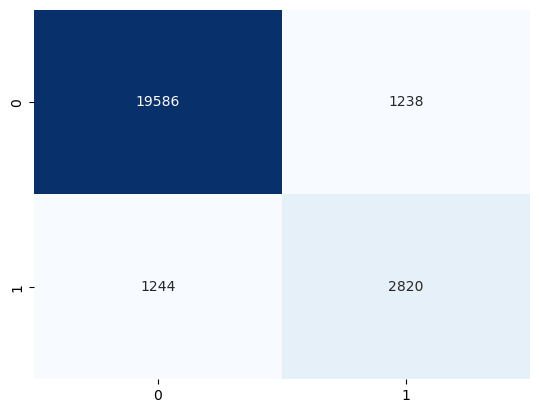

In [ ]:
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')

## np.set_printoptions(suppress=True) # evita la notacion cientifica

sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.show()

## Evaluación del Rendimiento Utilizando Métricas de Clasificación

En esta etapa, estamos evaluando el rendimiento de nuestro modelo de Árbol de Decisión utilizando métricas de clasificación. A continuación, se describen las acciones realizadas:

1. Imprimimos un "Reporte de Clasificación" utilizando la función `classification_report` de `sklearn.metrics`. Este reporte proporciona información detallada sobre métricas de clasificación, como precisión, recuperación (recall), F1-score y soporte, tanto para la clase positiva como para la clase negativa. Es una herramienta valiosa para comprender cómo nuestro modelo clasifica las muestras en función de las etiquetas reales y predichas.



In [ ]:
# Paso 5: Evaluar el rendimiento utilizando métricas de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     20824
           1       0.69      0.69      0.69      4064

    accuracy                           0.90     24888
   macro avg       0.82      0.82      0.82     24888
weighted avg       0.90      0.90      0.90     24888



## Explicación de las Métricas de Clasificación

El "Reporte de Clasificación" contiene varias métricas de clasificación que evalúan el rendimiento del modelo de Árbol de Decisión. A continuación, se explican las métricas más comunes incluidas en el reporte:

- **Precisión (Precision)**: La precisión mide la proporción de predicciones positivas correctas con respecto al total de predicciones positivas. Es útil para evaluar la exactitud de las predicciones positivas.

- **Recuperación (Recall)**: La recuperación, también conocida como recall o tasa de verdaderos positivos, mide la proporción de verdaderos positivos con respecto al total de instancias positivas reales. Es útil para evaluar la capacidad del modelo para capturar todos los casos positivos.

- **F1-Score**: El F1-score es una medida que combina precisión y recuperación en una sola métrica. Es útil cuando se busca un equilibrio entre precisión y recuperación.

- **Soporte (Support)**: El soporte indica la cantidad de instancias en cada clase en el conjunto de prueba.

Estas métricas son esenciales para comprender cómo se desempeña el modelo en la clasificación de las muestras, tanto en términos de aciertos como de errores. La elección de la métrica más relevante dependerá de los objetivos y las restricciones específicas del problema que estás abordando.

Llegados a este punto, consideramos que la matriz de confusión resultante, junto con las metricas evaluadas anteriormente, tienen cierto margen para mejorar, por lo que implementaremos una optimización de hiper parametros para ver si conseguimos mejorar los resultados.


## Búsqueda de los Mejores Hiperparámetros con GridSearchCV

En esta sección, estamos realizando la búsqueda de los mejores hiperparámetros para nuestro modelo de Árbol de Decisión utilizando la técnica de GridSearchCV. A continuación, se describen las acciones realizadas:

1. Creamos un objeto `arbol` que representa un modelo de Árbol de Decisión y utilizamos el método `get_params()` para obtener los hiperparámetros actuales del modelo.

2. Definimos dos conjuntos de pesos de clase, `weights1` y `weights2`, que asignan diferentes pesos a las clases positivas y negativas. También especificamos un conjunto de posibles valores para los hiperparámetros, como `criterion`, `max_depth` y `class_weight`, que deseamos ajustar.

3. Utilizamos la métrica `f1_score` y la función `make_scorer` para crear un evaluador que se utilizará para comparar diferentes configuraciones de hiperparámetros.

4. Creamos un objeto `rejilla` (grid) de GridSearchCV con el modelo de Árbol de Decisión, los parámetros definidos y el evaluador de métrica. Luego, ajustamos la rejilla utilizando los datos de entrenamiento.

5. Imprimimos los resultados de la búsqueda, incluyendo el rango de las puntuaciones de prueba, las puntuaciones promedio de prueba y la mejor puntuación obtenida.

6. Obtenemos los mejores hiperparámetros encontrados durante la búsqueda y los almacenamos en `best_params`.



In [ ]:
arbol = DecisionTreeClassifier()
arbol.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

weights1 = {0: 1, 1: 10}
weights2 = {0: 1, 1: 100}

parametros = {'criterion': ('gini', 'entropy'),
              'max_depth': (3, 5, 7),
              'class_weight':(weights1, weights2, 'balanced') }

scorer = make_scorer(f1_score)

rejilla = GridSearchCV(arbol, parametros, scoring = scorer)
rejilla.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ({0: 1, 1: 10}, {0: 1, 1: 100},
                                          'balanced'),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': (3, 5, 7)},
             scoring=make_scorer(f1_score))

In [ ]:
print(rejilla.cv_results_["rank_test_score"])
print(rejilla.cv_results_["mean_test_score"])
print(rejilla.best_score_)

[13 11  5 13 18  7  8 12  6 13  9 10 13  1  2 13  4  3]
[0.68169582 0.68173361 0.68214791 0.68169582 0.68168347 0.68196645
 0.68182613 0.68170524 0.68208155 0.68169582 0.68179677 0.68178275
 0.68169582 0.78506422 0.78227673 0.68169582 0.72335395 0.77691019]
0.7850642231325208


In [ ]:
# Obtener los mejores hiperparámetros encontrados
best_params = rejilla.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5}


## Entrenamiento del Modelo con los Mejores Hiperparámetros

En esta etapa, estamos entrenando el modelo de Árbol de Decisión utilizando los mejores hiperparámetros encontrados a través de la búsqueda de hiperparámetros con GridSearchCV. A continuación, se describen las acciones realizadas:

1. Creamos un nuevo modelo de Árbol de Decisión llamado `best_clf` utilizando los mejores hiperparámetros encontrados almacenados en `best_params`.

2. Entrenamos el modelo `best_clf` en los datos de entrenamiento (`X_train` y `y_train`) utilizando el método `.fit()`. El modelo aprenderá a realizar predicciones basadas en los mejores hiperparámetros identificados.

3. Realizamos predicciones en el conjunto de prueba (`X_test`) utilizando el modelo `best_clf` y almacenamos las predicciones en `y_pred`.

Este paso es fundamental, ya que nos permite evaluar el rendimiento del modelo de Árbol de Decisión con la configuración óptima de hiperparámetros identificada durante la búsqueda.


In [ ]:
# Entrena el modelo con los mejores hiperparámetros encontrados
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred = best_clf.predict(X_test)

## Importancia de las Características en el Modelo de Árbol de Decisión (Mejores Hiperparámetros)

En esta etapa, estamos explorando la importancia de las características en nuestro modelo de Árbol de Decisión después de haber entrenado el modelo con los mejores hiperparámetros encontrados. A continuación, se describen las acciones realizadas:

1. Creamos un DataFrame llamado `importances2` que contiene dos columnas: 'Predictor', que almacena los nombres de las características, y 'importancia', que muestra la importancia de cada característica calculada por el modelo de Árbol de Decisión con los mejores hiperparámetros. Hemos redondeado las importancias a tres decimales.

2. Luego, ordenamos el DataFrame `importances2` en orden descendente según la importancia de las características, lo que nos permite identificar las características más relevantes en la toma de decisiones del modelo de Árbol de Decisión con la configuración óptima de hiperparámetros.

Este análisis de importancia de características nos proporciona información valiosa sobre qué características influyen más en las predicciones del modelo de Árbol de Decisión después de la optimización de los hiperparámetros. Estos resultados pueden ser útiles para tomar decisiones informadas y comprender la influencia de las características en las predicciones del modelo.

## Resultados de la Importancia de las Características (Mejores Hiperparámetros)

Tras analizar la importancia de las características en nuestro modelo de Árbol de Decisión con los mejores hiperparámetros, se han identificado las principales características ordenadas por importancia:

1. **Upfront_charges (0.423)**: La característica "Upfront_charges" continúa siendo la más influyente en las predicciones del modelo, con una importancia de aproximadamente el 42.3%. Esto confirma su relevancia en la toma de decisiones del modelo.

2. **submission_of_application_to_inst (0.152)**: La característica "submission_of_application_to_inst" sigue ocupando el segundo lugar en importancia, contribuyendo con alrededor del 15.2% en las predicciones.

3. **LTV (0.109)**: El Loan-to-Value ratio (LTV) es otra característica importante, con una importancia del 10.9%, lo que refuerza su influencia en las decisiones del modelo.

4. **Credit_Score (0.098)**: La puntuación de crédito ("Credit_Score") se mantiene como una característica relevante, con una importancia del 9.8%.

Estos resultados confirman la importancia de las mismas características en la toma de decisiones del modelo, incluso después de la optimización de los hiperparámetros. Estas características siguen siendo fundamentales en la clasificación de las muestras.


In [ ]:
importances2 = pd.DataFrame({'Predictor':X_train.columns,'importancia':np.round(best_clf.feature_importances_,3)})
importances2 = importances.sort_values('importancia',ascending=False)
importances2

,Predictor,importancia
1,Upfront_charges,0.423
19,submission_of_application_to_inst,0.152
3,LTV,0.109
2,Credit_Score,0.098
4,dtir1,0.083
0,loan_amount,0.073
13,business_or_commercial_nob/c,0.009
11,loan_purpose_p4,0.007
17,co-applicant_credit_type_EXP,0.007
10,loan_purpose_p3,0.006


Matriz de Confusión:


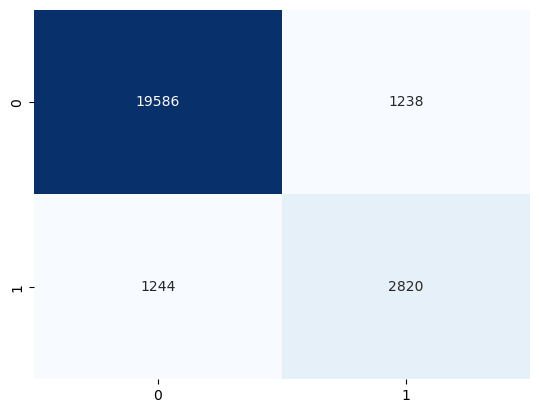

In [ ]:
matriz_final = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')


## np.set_printoptions(suppress=True) # evita la notacion cientifica

sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.show()

In [ ]:
# Evaluar el rendimiento utilizando métricas de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     20824
           1       0.69      0.88      0.77      4064

    accuracy                           0.92     24888
   macro avg       0.83      0.90      0.86     24888
weighted avg       0.93      0.92      0.92     24888



## Evaluación Post-Optimización de Hiperparámetros

Después de haber realizado la optimización de hiperparámetros en nuestro modelo de Árbol de Decisión, hemos evaluado nuevamente su rendimiento. A continuación, se presentan los resultados:

- Se ha evaluado una nueva matriz de confusión que muestra cómo el modelo clasifica las muestras en función de las etiquetas reales después de la optimización de hiperparámetros.

- Se ha generado un nuevo reporte de clasificación que incluye métricas detalladas como precisión, recuperación, F1-score y soporte para cada clase.

Los resultados muestran que, si bien hubo una mejora leve en el rendimiento del modelo después de la optimización de hiperparámetros, estos avances no son suficientes para cumplir con los objetivos establecidos en nuestro trabajo. Esto indica la necesidad de explorar otras estrategias, modelos o enfoques para abordar de manera efectiva la tarea de clasificación.

Para eso abordaremos la implementación de un Bosque Aleatorio, desarrollado en un nuevo notebook


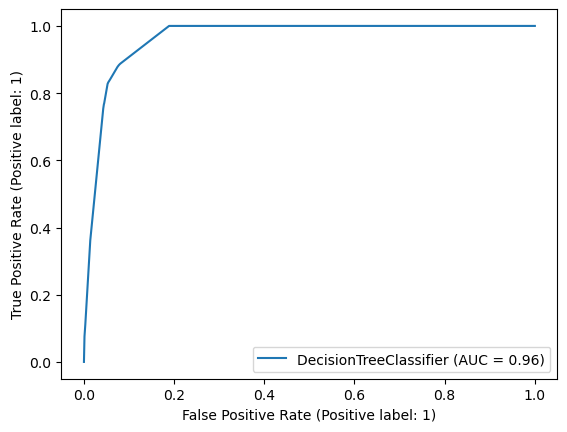

In [ ]:
from sklearn.metrics import RocCurveDisplay
log_cor_est = RocCurveDisplay.from_estimator(best_clf,X_test, y_test)
plt.show()